In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Different to before, we have now a non-linear dependency between x & y...

In [26]:
N = 10

X = np.sort(2 * np.random.rand(N, 1), axis=0)
y = 4 + 3 * X + 5*X**2 + np.random.randn(N, 1)

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[3.82282766] [[3.05769224 4.88708156]]


Predicting as before and we see that the fit is quite good

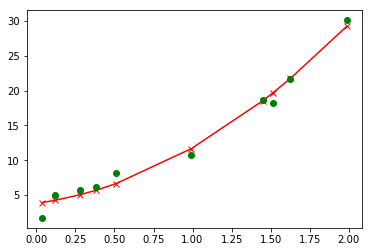

In [28]:
ypred = lin_reg.intercept_ + lin_reg.coef_[0][0]*X + lin_reg.coef_[0][1]*X**2
plt.plot(X, ypred, '-rx', X, y,'go')

Now let's increase the polynom degree to 10 and fit the data

In [29]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[-0.93089092] [[   83.26920974  -307.48729194    37.17880145  1960.21886655
  -3528.1714859    853.57268372  3232.02643206 -3573.62970375
   1476.6472863   -221.88216165]]


... and we run into a classical overfitting - look at the coefficient values! However, since polydegree = number of data points, we get a perfect match

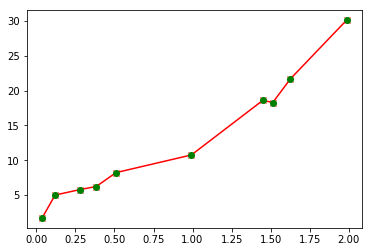

In [30]:
# ypred = lin_reg.intercept_ + np.sum([lin_reg.coef_[0][i]*X**(i+1) for i in range(10)], axis=0)
# simpler
ypred = lin_reg.predict(X_poly)
plt.plot(X, ypred, '-rx', X, y,'go')

Using Ridge regression; loss function = $MSE(\theta) + \frac{\alpha}{2} \sum_i \theta_i^2$. The $\alpha$ value causes the coefficients not to become "too big".


In [31]:
ridge_reg = Ridge(alpha=1, solver='cholesky',fit_intercept=False)
ridge_reg.fit(X_poly,y)
ridge_reg.coef_

array([[ 5.82018935,  2.48504772,  1.20870742,  0.59666879,  0.24197592,
         0.01204482, -0.12178263, -0.14464358, -0.04922986,  0.0578896 ]])

Prediction - The match is worse than before, but less erratic...

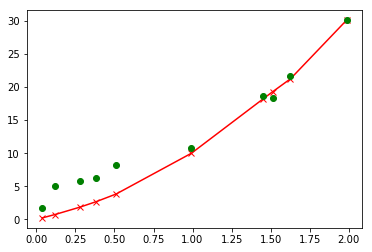

In [32]:
ypred_ridge = ridge_reg.predict(X_poly)
plt.plot(X, ypred_ridge, '-rx', X, y,'go')

In [33]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
lasso_reg.coef_

/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 6.20183134e+00,  0.00000000e+00,  0.00000000e+00,  5.35087049e-01,
        4.00516010e-01,  4.44738364e-02,  0.00000000e+00,  0.00000000e+00,
       -8.48543294e-03, -5.62844575e-03])

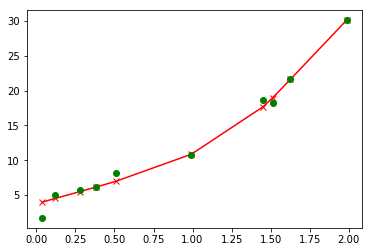

In [34]:
ypred_lasso = lasso_reg.predict(X_poly)
plt.plot(X, ypred_lasso, '-rx', X, y,'go')

What does PolynomialFeature do? It takes a matrix of $N$ column vectors, $X =[X_1 \cdots X_N]$, and poduces a matrix with all combinations of the form $[X_1 \quad X_1^2 \quad X_1 X_2 \quad X_2^2 \cdots]$ up to the provided degree ($X_i^2 $ denotes element-wise squaring, $X_1 X_2$ denotes element-wise multiplication).

In [35]:
x = np.array([[1,4],[2,5],[3,6]])
pf = PolynomialFeatures(degree=2, include_bias=False)
x_poly = pf.fit_transform(x)
print(x)
print(x_poly)

[[1 4]
 [2 5]
 [3 6]]
[[ 1.  4.  1.  4. 16.]
 [ 2.  5.  4. 10. 25.]
 [ 3.  6.  9. 18. 36.]]
